<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/Updated_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:

# Load the dataset
df = pd.read_csv('/content/AMZN.csv')  # Assuming this is the correct path to your data file

# Let's assume 'Close' is the target variable for prediction
df = df[['Close']]

# Normalization of data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Preparing the dataset
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])  # Assuming the first column is the target
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(scaled_data, time_steps)


In [ ]:
!pip install keras-tuner  # Install the keras-tuner library
from kerastuner.tuners import RandomSearch # Import the RandomSearch tuner

# Define the function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1)) # Assuming a single output neuron for regression
    model.compile(optimizer='adam', loss='mse') # Assuming mean squared error as the loss
    return model

# Assuming X_train and y_train are already defined from a previous step
tuner = RandomSearch(
    build_model,  # Pass the function reference
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train, epochs=50, validation_split=0.1)

Trial 10 Complete [00h 08m 16s]
val_loss: 1.5940155208227225e-05

Best val_loss So Far: 1.4120495810251063e-05
Total elapsed time: 00h 47m 12s


In [ ]:

# Splitting data into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshaping for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [ ]:

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True) # Change file extension to '.keras'

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 4.2626e-04 - val_loss: 1.0818e-04
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.0818e-05 - val_loss: 6.3120e-05
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.9450e-05 - val_loss: 1.1322e-04
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7710e-05 - val_loss: 6.1486e-05
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.7818e-05 - val_loss: 4.6312e-05
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.8649e-05 - val_loss: 6.1162e-05
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.5737e-05 - val_loss: 5.5626e-05
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.9585e-05 - val_loss: 6.6767e-05
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4816e-05 - val_loss: 1.0527e-04
Epoch 10/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.0660e-05 - val_loss: 9.8822e-05
Epoch 11/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/

Test Loss: 0.0006614438607357442
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
RMSE: 4.796527894859612
MAE: 3.5298535299152167
MAPE: 2.8340899560109123


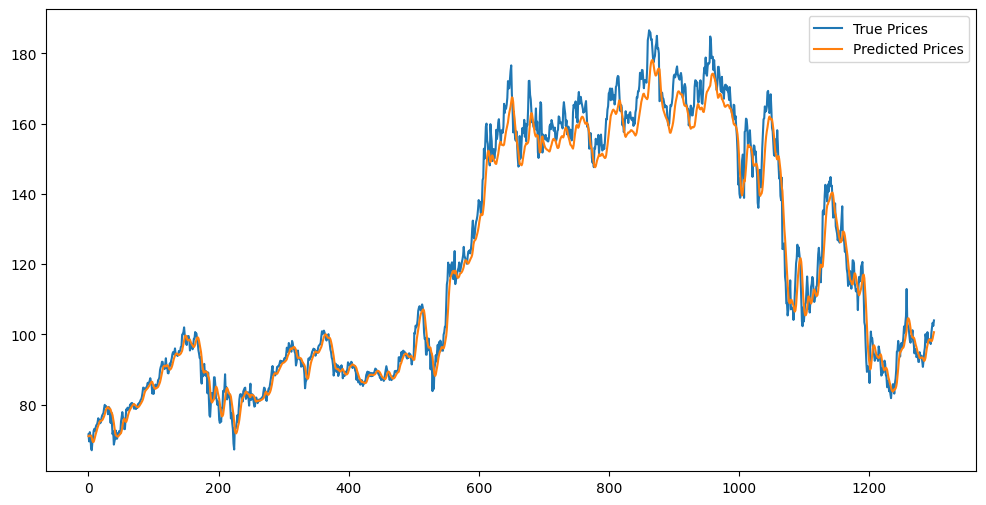

In [ ]:

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Predict
predictions = model.predict(X_test)

# Inverse scaling
predictions_inverse = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], df.shape[1] - 1))], axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], df.shape[1] - 1))], axis=1))[:, 0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()
